In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

In [166]:
df = pd.read_csv('dados_func.csv')

##Análise Exploratória

In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nivel_satisfacao       14999 non-null  float64
 1   ultima_avaliacao       14999 non-null  float64
 2   numero_projetos        14999 non-null  int64  
 3   horas_medias_por_mes   14999 non-null  int64  
 4   tempo_empresa          14999 non-null  int64  
 5   acidente_trabalho      14999 non-null  int64  
 6   deixou_empresa         14999 non-null  int64  
 7   ultima_promocao_5anos  14999 non-null  int64  
 8   area                   14999 non-null  object 
 9   salario                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df['nivel_satisfacao'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: nivel_satisfacao, dtype: float64

In [8]:
df['ultima_avaliacao'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: ultima_avaliacao, dtype: float64

In [9]:
df['horas_medias_por_mes'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: horas_medias_por_mes, dtype: float64

In [10]:
df['area'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
df['salario'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df['ultima_promocao_5anos'].unique()

array([0, 1])

In [13]:
frequency_target = df['deixou_empresa'].value_counts()

In [14]:
percent_target_1 = round(frequency_target[1] / sum(frequency_target), 2) * 100 

In [15]:
percent_target_0 = round(frequency_target[0] / sum(frequency_target), 3) * 100 

In [16]:
print(f'Dexiou Empresa {percent_target_1}% - Não Deixou Empresa {percent_target_0}%')

Dexiou Empresa 24.0% - Não Deixou Empresa 76.2%


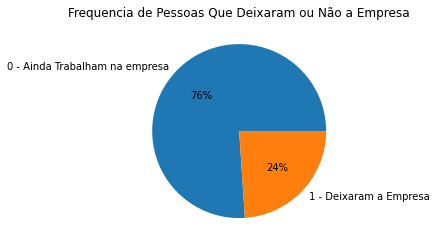

In [17]:
plt.pie(x=[percent_target_0, percent_target_1], labels=['0 - Ainda Trabalham na empresa','1 - Deixaram a Empresa'], autopct='%.0f%%', shadow=False)
plt.title('Frequencia de Pessoas Que Deixaram ou Não a Empresa')
plt.show()

In [18]:
frequency_accident = df['acidente_trabalho'].value_counts()

In [19]:
percent_accident_1 = round(frequency_accident[1] / sum(frequency_accident), 2) * 100 

In [20]:
percent_accident_0 = round(frequency_accident[0] / sum(frequency_accident), 2) * 100 

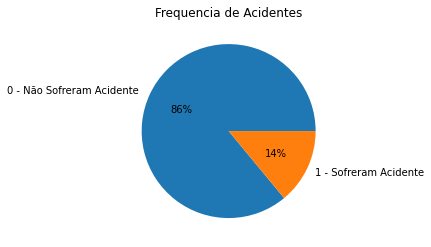

In [21]:
plt.pie(x=[percent_accident_0, percent_accident_1], labels=['0 - Não Sofreram Acidente ','1 - Sofreram Acidente'], autopct='%.0f%%', shadow=False)
plt.title('Frequencia de Acidentes')
plt.show()

In [22]:
frequency_promotion = df['ultima_promocao_5anos'].value_counts()

In [23]:
percent_promotion_1 = round(frequency_promotion[1] / sum(frequency_promotion), 2) * 100 

In [24]:
percent_promotion_0 = round(frequency_promotion[0] / sum(frequency_promotion), 2) * 100 

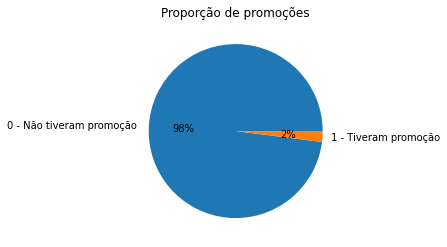

In [25]:
plt.pie(x=[percent_promotion_0, percent_promotion_1], labels=['0 - Não tiveram promoção ','1 - Tiveram promoção'], autopct='%.0f%%', shadow=False)
plt.title('Proporção de promoções')
plt.show()

In [30]:
df.query('ultima_promocao_5anos == 1')['ultima_promocao_5anos'].count()

319

In [31]:
df.query('ultima_promocao_5anos == 0')['ultima_promocao_5anos'].count()

14680

In [75]:
area_sum = df['area'].value_counts()

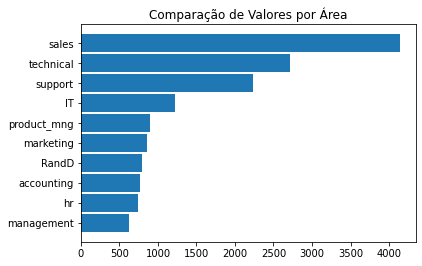

In [79]:
axis_y = area_sum
axis_x = area_sum.index

fig, ax = plt.subplots()

ax.barh(axis_x, axis_y, 0.9)
ax.invert_yaxis() 
ax.set_title('Comparação de Valores por Área')

plt.show()

In [78]:
sal_sum = df['salario'].value_counts()

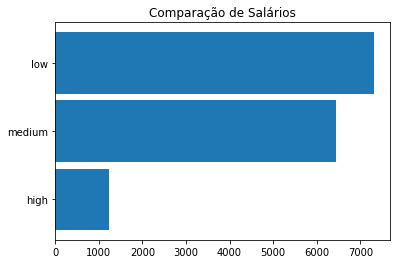

In [80]:
axis_x = sal_sum.index
axis_y = sal_sum

fig, ax = plt.subplots()
ax.barh(axis_x, axis_y, 0.9)
ax.invert_yaxis()
ax.set_title('Comparação de Salários')

plt.show()


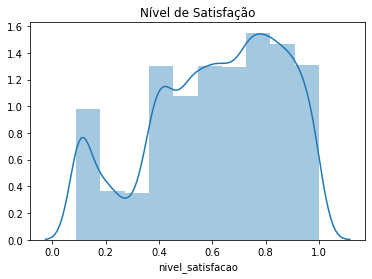

In [98]:
axis_x = df['nivel_satisfacao']
sns.distplot(axis_x, bins=10 )
plt.title('Nível de Satisfação')
plt.show()

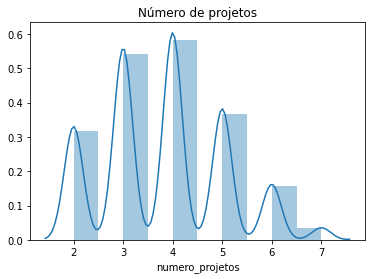

In [99]:
axis_x = df['numero_projetos']
sns.distplot(axis_x, bins=10 )
plt.title('Número de projetos')
plt.show()

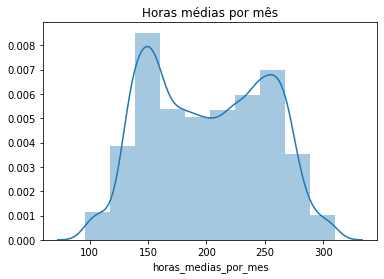

In [101]:
axis_x = df['horas_medias_por_mes']
sns.distplot(axis_x, bins=10, kde=True )
plt.title('Horas médias por mês')
plt.show()

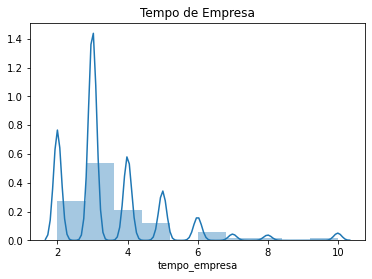

In [102]:
axis_x = df['tempo_empresa']
sns.distplot(axis_x, bins=10, kde=True )
plt.title('Tempo de Empresa')
plt.show()

In [105]:
df.dtypes

nivel_satisfacao         float64
ultima_avaliacao         float64
numero_projetos            int64
horas_medias_por_mes       int64
tempo_empresa              int64
acidente_trabalho          int64
deixou_empresa             int64
ultima_promocao_5anos      int64
area                      object
salario                   object
dtype: object

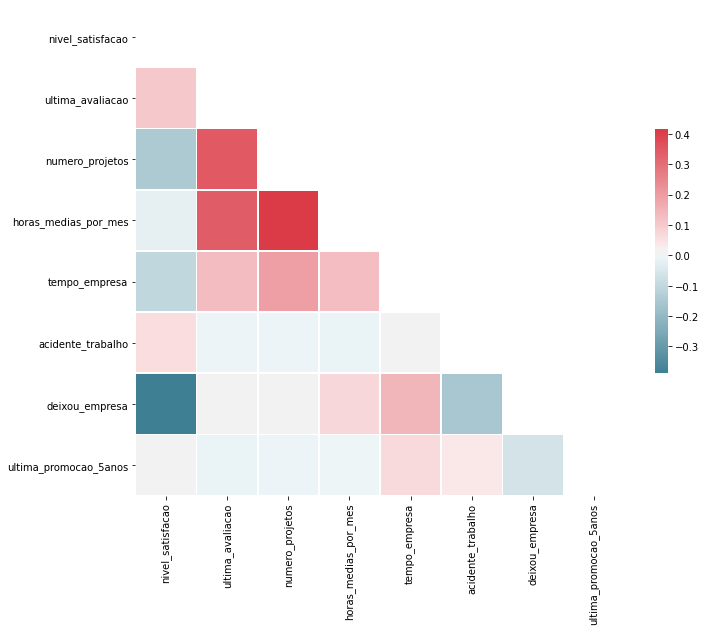

In [112]:
fig, ax = plt.subplots(figsize=(11, 9))

corr = df.select_dtypes(include=['float64', 'int64']).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

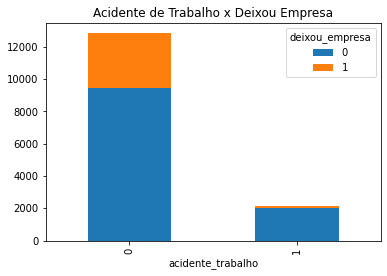

In [120]:
ct = pd.crosstab(df['acidente_trabalho'],df['deixou_empresa'])
ct.plot.bar(stacked=True)
plt.title('Acidente de Trabalho x Deixou Empresa')
plt.show()

In [121]:
df.query('acidente_trabalho == 1')['acidente_trabalho'].count() / df['acidente_trabalho'].count()

0.1446096406427095

In [122]:
df.query('acidente_trabalho == 0')['acidente_trabalho'].count() / df['acidente_trabalho'].count()

0.8553903593572905

In [127]:
df.query('acidente_trabalho == 0 and deixou_empresa == 1')['acidente_trabalho'].count() / df['acidente_trabalho'].count()

nivel_satisfacao         0.226815
ultima_avaliacao         0.226815
numero_projetos          0.226815
horas_medias_por_mes     0.226815
tempo_empresa            0.226815
acidente_trabalho        0.226815
deixou_empresa           0.226815
ultima_promocao_5anos    0.226815
area                     0.226815
salario                  0.226815
dtype: float64

In [124]:
df.query('acidente_trabalho == 1 and deixou_empresa == 1')['acidente_trabalho'].count() / df['acidente_trabalho'].count()

0.01126741782785519

In [129]:
pd.crosstab(df['acidente_trabalho'],df['deixou_empresa'])

deixou_empresa,0,1
acidente_trabalho,,
0,9428,3402
1,2000,169


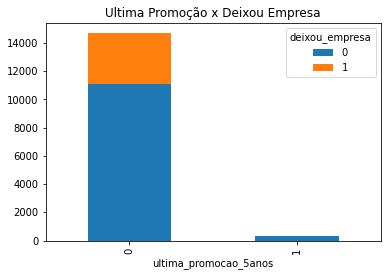

In [130]:
ct = pd.crosstab(df['ultima_promocao_5anos'],df['deixou_empresa'])
ct.plot.bar(stacked=True)
plt.title('Ultima Promoção x Deixou Empresa')
plt.show()

In [134]:
df.groupby('area').agg({'deixou_empresa':'mean'})

,deixou_empresa
area,
IT,0.222494
RandD,0.153748
accounting,0.265971
hr,0.290934
management,0.144444
marketing,0.236597
product_mng,0.219512
sales,0.244928
support,0.248991


In [135]:
df.groupby('salario').agg({'deixou_empresa':'mean'})

,deixou_empresa
salario,
high,0.066289
low,0.296884
medium,0.204313


In [136]:
df.groupby('ultima_promocao_5anos').agg({'deixou_empresa':'mean'})

,deixou_empresa
ultima_promocao_5anos,
0,0.241962
1,0.059561


## Transformação


In [247]:
df = pd.get_dummies(df)

## Separação dos dados


In [248]:
X = df.drop('deixou_empresa', axis=1)
y = df['deixou_empresa']

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

##Regressao Logistica

In [281]:
clf = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial').fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [282]:
y_pred = clf.predict(x_test)

In [283]:
print("train data score:{:.3f}".
     format(clf.score(x_train,y_train) * 100))

print("test data score:{:.3f}".
     format(clf.score(x_test,y_test) * 100))

train data score:79.369
test data score:78.756


In [252]:
cm = confusion_matrix(y_test, y_pred)

In [253]:
cm

array([[3172,  256],
       [ 707,  365]])

## Árvore de Decisao

In [284]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='entropy',
                             max_depth=90).fit(x_train, y_train)

In [285]:
print("train data score:{:.3f}".
     format(clf.score(x_train,y_train) * 100))

print("test data score:{:.3f}".
     format(clf.score(x_test,y_test) * 100))

train data score:100.000
test data score:98.667


## Classificador Bayesiano

In [288]:
clf = GaussianNB().fit(x_train, y_train)

print("train data score:{:.3f}".
     format(clf.score(x_train,y_train) * 100))

print("test data score:{:.3f}".
     format(clf.score(x_test,y_test) * 100))

train data score:66.025
test data score:65.022


## Variáveis mais importantes

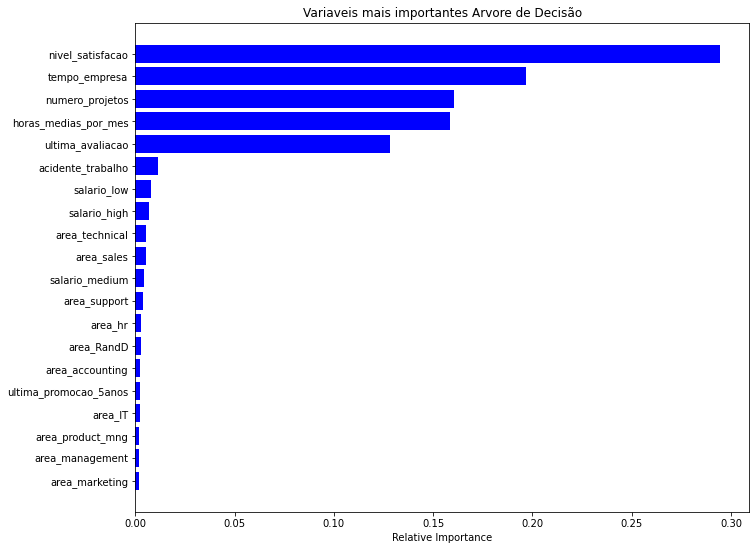

In [287]:
features = X.columns
rfc_feature_importance = clf.feature_importances_
index = np.argsort(rfc_feature_importance)

fig, ax = plt.subplots(figsize=(11, 9))

ax.barh(range(len(index)), rfc_feature_importance[index], color='b', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')
plt.title('Variaveis mais importantes Arvore de Decisão')
plt.show()
